# Text Analysis 
The computational text analysis began in the early 1949s when Father Robert Busa produced concordance for Thomas Aquinas works by using computer. Later, it is extended to investigate author attribution, stylistic and linguistic variation. This process augmented after the establishment of the digitisation of printed text, digital publication and digital formation that transform the humanities way of approaching the text.<br>

In this lesson, first we are going to learn a simple frequent word analysis and then move to...

## Frequent word analysis 

For this analysis, we can download a text file of a...from Gutenberg...I will also explain the same using the HTML link of the novel.

In [10]:
from collections import Counter # import this module for counting the words 
import pandas as pd
import matplotlib as plt
import re

### what is stopwords list? 
This might sound familiar to most of you! Removing words like _a_,_an_,_the_ etc.would...

Now we access the text (copy the text file and place it in your working directory)

In [11]:
file = open ('Pamela.txt', encoding = "UTF-8") 
text = file.read()

### Next we need to remove the metadata such as the information related to author, publisher and Project Gutenberg 

In [12]:
extract1 = text.find("LETTER I")
extract2 = text.find("End of Project Gutenberg's Pamela, or Virtue Rewarded, by Samuel Richardson")
analysis_part = text[extract1:extract2]
print(analysis_part)

LETTER I


DEAR FATHER AND MOTHER,

I have great trouble, and some comfort, to acquaint you with. The
trouble is, that my good lady died of the illness I mentioned to you,
and left us all much grieved for the loss of her; for she was a dear
good lady, and kind to all us her servants. Much I feared, that as I
was taken by her ladyship to wait upon her person, I should be quite
destitute again, and forced to return to you and my poor mother, who
have enough to do to maintain yourselves; and, as my lady's goodness
had put me to write and cast accounts, and made me a little expert at my
needle, and otherwise qualified above my degree, it was not every family
that could have found a place that your poor Pamela was fit for: but
God, whose graciousness to us we have so often experienced at a pinch,
put it into my good lady's heart, on her death-bed, just an hour before
she expired, to recommend to my young master all her servants, one by
one; and when it came to my turn to be recommended, (fo

In [4]:
stopword_list = set(line.strip() for line in open('stopwords_en.txt'))

In [5]:
Frequent_word = {}

In [6]:
for words in analysis_part.lower().split():
    words = words.replace(".","")
    words = words.replace(",","")
    words = words.replace(":","")
    words = words.replace("\"","")
    words = words.replace("!","")
    words = words.replace("Ã¢â‚¬Å“","")
    words = words.replace("Ã¢â‚¬Ëœ","")
    words = words.replace("*","")
    if words not in stopword_list:
        if words not in Frequent_word:
            Frequent_word[words] = 1
        else:
            Frequent_word[words] += 1

In [7]:
import collections
top_words = collections.Counter(Frequent_word)

How many the most frequent words to print: 10
('good', 832)
('mrs', 808)
('sir', 769)
('dear', 724)
('master', 569)
('poor', 528)
('mr', 464)
('pamela', 461)
('lady', 434)
('make', 421)


<AxesSubplot:xlabel='Word'>

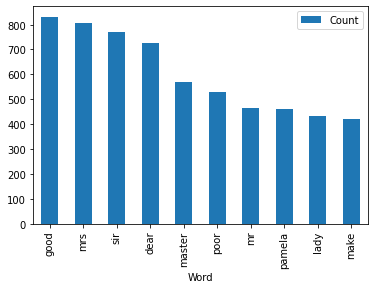

In [8]:
no_top_words = int(input("How many the most frequent words to print: "))
for count in top_words.most_common(no_top_words):
    print(count)
lsts = top_words.most_common(no_top_words)
df = pd.DataFrame(lsts, columns = ['Word', 'Count'])
df.plot.bar(x='Word',y='Count')